![logo](http://certik.github.io/scipy-2013-tutorial/html/_static/sympylogo.png)

# SymPy

`SymPy` is a package for symbolic calculations in python, similar to *Mathematica*. It works with expressions containing symbols.

In [1]:
import sympy as sy
from sympy import *
from sympy.abc import x,y,z,t
init_printing()

Symbols are basic bricks used to construct expressions.
Each symbol has a name used for printing expressions. Objects of the class `Symbol` should be created and assigned to python variables in order to be used in expressions. The symbol name and the name of the variable to which this symbol is assigned are two independent things, and one may write `abc=Symbol('xyz')`. But then one has to write `abc` in input expressions, while `SymPy` will write `xyz` in output ones, producing unnecessary confusion. The python variable name should better be the same as the symbol name.

In languages specifically designed for symbolic calculations, such as *Mathematica*, if a variable to which nothing has been assigned is used, it automatically means a symbol with the same name. Python has not been designed for symbolic calculations. If you use a variable to which nothing has been assigned, you will get an error message. Symbol objects have to be created explicitly.

In [2]:
a=x**2-1
a

Several symbols can be defined at once. The string is split at spaces.

In [3]:
y,z=symbols('y z')

Let's substitute $y+1$ for $x$.

In [4]:
a.subs(x,y+1)

## Polynomials and rational functions

`SymPy` does not expand brackets automatically. The function `expand` is used for this.

In [5]:
a=(x+y-z)**6
a

In [6]:
a=expand(a)
a

Degree of the polynomial $a$ in $x$.

In [7]:
degree(a,x), degree(a,z), degree(a,a), degree(a,t), degree(a,x**2)

Let's collect terms with same power of $x$ together.

In [8]:
collect(a,x)

Any polynomial with integer coefficients can be factorized into polynomials with integer coefficients (which cannot be factorized further). There exist efficient algorithms to do this.

In [9]:
a=expand(a)
a

In [10]:
factor(a)

In [11]:
factor(a+1)

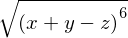

In [12]:
factor(sqrt(a))

In [13]:
simplify(sqrt(a))

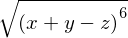

In [14]:
simplify(factor(sqrt(a)))

`SymPy` does not automatically cancel ratios of polynomials by their greatest common divisor. The function `cancel` is used for this.

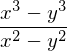

In [15]:
a=(x**3-y**3)/(x**2-y**2)
a

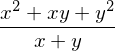

In [16]:
cancel(a)

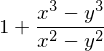

In [17]:
a+1

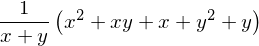

In [18]:
cancel(a+1)

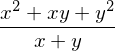

In [19]:
factor(a)

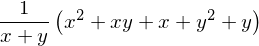

In [20]:
factor(a+1)

`SymPy` does not automatically bring sums of rational expressions to common denominator. The function `together` is used for this.

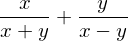

In [21]:
a=y/(x-y)+x/(x+y)
a

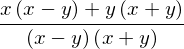

In [22]:
together(a)

The function `simplify` tries to rewrite an expression *in a simplest form*. This concept is not well defined (different forms may be considered simplest in different contexts), and there exists no algorithm for such simplification. The function `simplify` works heuristically, and it is not possible to guess in advance what simplifications it will try. It is very convenient in interactive sessions in order to check if it will succeed in rewriting an expression in some reasonably good form. But it is not desirable to use it in programs. There one should better use more specialized functions which perform well defined expression transformations.

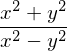

In [23]:
simplify(a)

Partial fraction decomposition with respect to $x$.

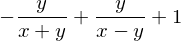

In [24]:
apart(a,x)

Let's substitute some values for the symbils $x$ and $y$.

In [25]:
a=a.subs({x:1,y:2})
a

And how much is it numerically?

In [26]:
a.n()

## Elementary functions

`SymPy` automatically applies simplifications of elementary functions which are correct everywhere.

In [27]:
sin(-x)

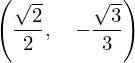

In [28]:
cos(pi/4),tan(5*pi/6)

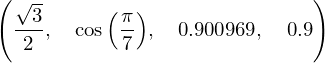

In [29]:
cos(pi/6), cos(pi/7), cos(pi/7).n(6), cos(pi/7).n(2)

`SymPy` can work with floating point numbers having arbitrarily high precision. Here is $\pi$ with 100 significant digits.

In [30]:
pi.n(100)

`E` is the base of natural logarithms.

In [31]:
log(1),log(E)

In [32]:
exp(log(x)), log(exp(x))

In [33]:
log(exp(2*pi*I))

In [34]:
log(exp(Symbol('x', real=True))), log(exp(Symbol('x')))

Why not $x$? Try $x=2\pi i$.

In [35]:
sqrt(0)

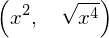

In [36]:
sqrt(x)**4, sqrt(x**4)

In [37]:
I**2, I**4, sqrt(I**4)

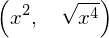

In [38]:
sqrt(Symbol('x', real=True)**4), sqrt(Symbol('x')**4),

Why not $x^2$? Try $x=i$.

Symbols can have certain properties. E.g., they can be positive. Then `SymPy` can simplify square roots better.

In [39]:
p,q=symbols('p q',positive=True)
sqrt(p**2)

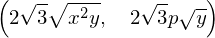

In [40]:
sqrt(12*x**2*y),sqrt(12*p**2*y)

Let the symbol $n$ be integer (`I` is the imaginary unit).

In [41]:
n=Symbol('n',integer=True)
exp(2*pi*I*n), exp(2*pi*I*x), exp(2*pi*I*Symbol('r',real=True))

The method `rewrite` tries to rewrite an expression in terms of a given function.

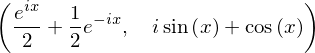

In [42]:
cos(x).rewrite(exp), exp(I*x).rewrite(cos)

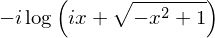

In [43]:
asin(x).rewrite(log)

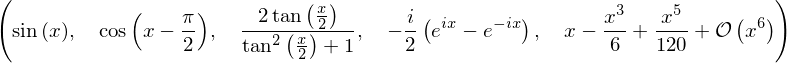

In [44]:
a = sin(x)
a.rewrite(sqrt), a.rewrite(cos), a.rewrite(tan), a.rewrite(exp), a.series()

The function `trigsimp` tries to rewrite a trigonometric expression *in a simplest form*. In programs it is better to use more specialized functions.

In [45]:
a = (2*sin(x)**2 + 3*cos(x)**2)
a, trigsimp(a)

The function `expand_trig` expands sines and cosines of sums and multiple angles.

In [46]:
expand_trig(sin(x-y)), expand_trig(sin(2*x))

The inverse transformation, rewriting products and powers of sines and cosines into expressions linear in these functions, is needed more often. Suppose we work with a truncated Fourier series.

In [47]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

We want to square it and get a truncated Fourier series again.

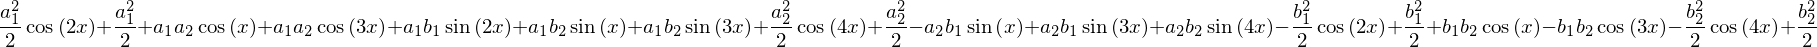

In [48]:
a=(a**2).rewrite(exp).expand().rewrite(cos).expand()
a

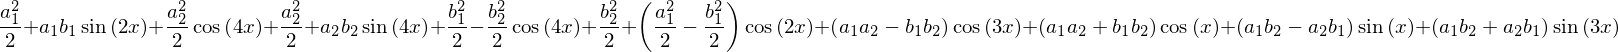

In [49]:
a.collect([cos(x),cos(2*x),cos(3*x),sin(x),sin(2*x),sin(3*x)])

The function `expand_log` transforms logarithms of products and powers (of positive quantities) into sums of logarithms; `logcombine` performs the inverse transformation.

In [50]:
p,q = symbols('p q', positive=True)
b = log(p*q**2)
a=expand_log(b)
b,a

In [51]:
logcombine(a)

The function `expand_power_exp` rewrites powers whose exponents are sums via products of powers.

In [52]:
a=x**(p+q)
a, expand_power_exp(a)

The function `expand_power_base` rewrites powers whose bases are products via products of powers.

In [53]:
a=(x*y)**n
a, expand_power_base(a)

The function `powsimp` performs the inverse transformations.

In [54]:
powsimp(exp(x)*exp(2*y)), powsimp(x**n*y**n)

New symbolic functions can be introduced. They may have an arbitrary numbers of arguments.

In [55]:
f=Function('f')
f(x)+f(x,y)

## Expression structure

Internally expressions are trees. The function `srepr` returns a string representing this tree.

In [56]:
srepr(x+1)

"Add(Symbol('x'), Integer(1))"

In [57]:
srepr(x-1)

"Add(Symbol('x'), Integer(-1))"

In [58]:
srepr(x-y)

"Add(Symbol('x'), Mul(Integer(-1), Symbol('y')))"

In [59]:
srepr(2*x*y/3)

"Mul(Rational(2, 3), Symbol('x'), Symbol('y'))"

In [60]:
srepr(x/y)

"Mul(Symbol('x'), Pow(Symbol('y'), Integer(-1)))"

One may use the functions `Add`, `Mul`, `Pow`, etc. instead of the binary operations `+`, `*`, `**`, etc.

In [61]:
Mul(x,Pow(y,-1))

In [62]:
srepr(f(x,y))

"Function('f')(Symbol('x'), Symbol('y'))"

The attribute `func` is the top-level function of an expression, and `args` is the list of its agruments.

In [63]:
a=2*x*y**2
a.func

sympy.core.mul.Mul

In [64]:
a.args

In [65]:
for i in a.args:
    print(i)

2
x
y**2


The function `subs` substitutes an expression for a symbol.

In [66]:
a.subs(y,2)

It can perform substitutions for several symbols. To this end, one calls it with a list of tuples or a dictionary.

In [67]:
a.subs([(x,pi),(y,2)])

In [68]:
a.subs({x:pi,y:2})

It can substitute not only for a symbol but also for a subexpression - a function with arguments.

In [69]:
a=f(x)+f(y)
a.subs(f(y),1)

In [70]:
(2*x*y*z).subs(x*y,z)

In [71]:
x+x**2+x**3+x**4

In [72]:
(x+x**2+x**3+x**4).subs(x**2,y)

Substitutions are performed sequentially. In this case, first $x$ is replaced by $y$ producing $y^3+y^2$; then $y$ is replaced by $x$ in this result.

In [73]:
a=x**2+y**3
a.subs([(x,y),(y,x)])

Interchanging these substitutions leads to a different result.

In [74]:
a.subs([(y,x),(x,y)])

But if one calls `subs` with the keyword parameter `simultaneous=True`, all substitutions are preformed simultaneously. In this way one can, e.g., interchange $x$ and $y$.

In [75]:
a.subs([(x,y),(y,x)], simultaneous=True)

A function can be replaced by another function.

In [76]:
g=Function('g')
a=f(x)+f(y)
a.subs(f,g)

The method `replace` searches for subexpressions matching a pattern (with wildcards) and replaces them by a given expression.

In [77]:
a=Wild('a')
(f(x)+f(x+y)).replace(f(a),a**2)

In [78]:
(f(x,x)+f(x,y)).replace(f(a,a),a**2)

In [79]:
a=x**2+y**2
a.replace(x,x+1)

Only a complete subtree can match a pattern, not a subset of factors in a product or a smaller power in a larger one.

In [80]:
a=2*x*y*z
a.replace(x*y,z)

In [81]:
a=2*(x*y)*z
a.replace(x*y,z)

In [82]:
(x+x**2+x**3+x**4).replace(x**2,y)

## Solving equations

In [83]:
a,b,c,d,e,f=symbols('a b c d e f')

An equation is represented by the function `Eq` with two arguments. The function `solve` returns a list of solutions.

In [84]:
solve(Eq(a*x,b),x)

Instead of equations, one may pass just expressions to `solve`;
they mean equations `<expression>=0`.

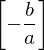

In [85]:
solve(a*x+b,x)

A square equation has 2 solutions.

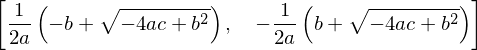

In [86]:
solve(a*x**2+b*x+c,x)

A system of linear equations.

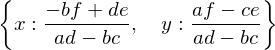

In [87]:
solve([a*x+b*y-e,c*x+d*y-f],[x,y])

The function `roots` returns roots of a polynomial together with their multiplicities.

In [88]:
eq=x**3-3*x+a
eq1=eq.subs({a:2})
eq, eq1

In [89]:
roots(eq1,x)

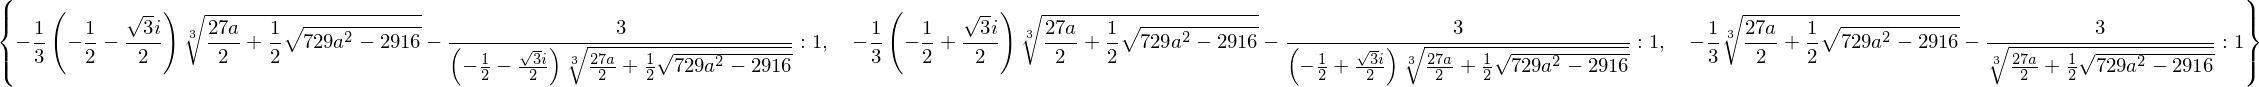

In [90]:
sol=roots(eq,x)
sol

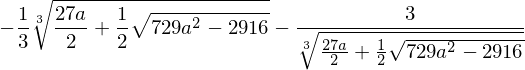

In [91]:
s1=list(sol.keys())[0]
s1

In [92]:
simplify(eq.subs({x:s1}))

The function `solve_poly_system` solves systems of polynomial equations by constructing their Gröbner bases.

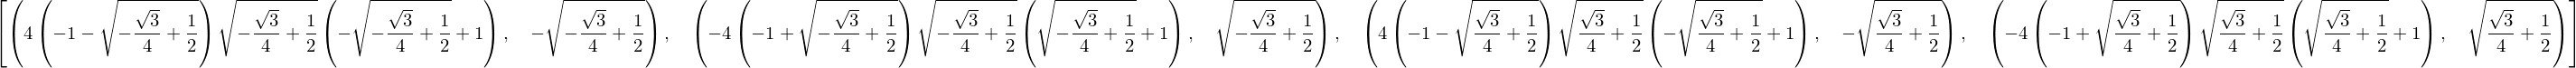

In [93]:
p1=x**2+y**2-1
p2=4*x*y-1
sol=solve_poly_system([p1,p2],x,y)
sol

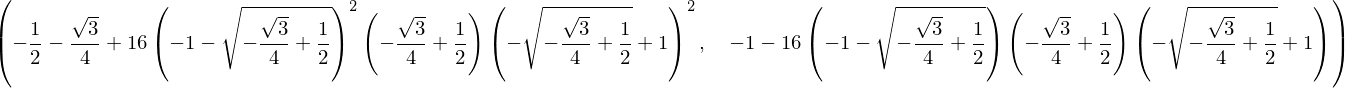

In [94]:
x1,y1 = sol[0]
s1=p1.subs({x:x1,y:y1})
s2=p2.subs({x:x1,y:y1})
s1,s2

In [95]:
simplify(s1),simplify(s2)

## Series

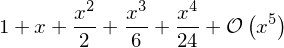

In [96]:
exp(x).series(x,0,5)

A series can start from a negative power.

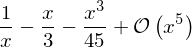

In [97]:
cot(x).series(x,n=5)

And even run over half-integer powers.

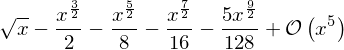

In [98]:
sqrt(x*(1-x)).series(x,n=5)

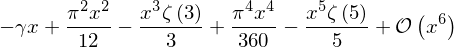

In [99]:
log(gamma(1+x)).series(x,n=6).rewrite(zeta)

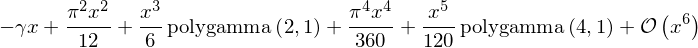

In [100]:
log(gamma(1+x)).series(x,n=6)

Let's prepare 3 series.

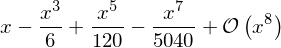

In [101]:
sinx=series(sin(x),x,0,8)
sinx

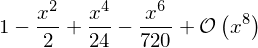

In [102]:
cosx=series(cos(x),x,n=8)
cosx

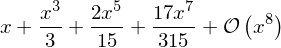

In [103]:
tanx=series(tan(x),x,n=8)
tanx

Products and ratios of series are not calculated automatically, the function `series` should be applied to them.

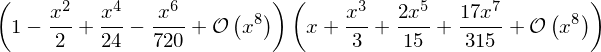

In [104]:
tanx*cosx

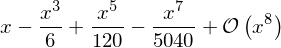

In [105]:
series(tanx*cosx,n=8)

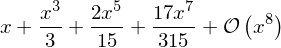

In [106]:
series(sinx/cosx,n=8)

And this series should be equal to 1. But since `sinx` and `cosx` are known only with a limited accuracy, we obtain 1 with the same accuracy.

In [107]:
series(sinx**2+cosx**2,n=8)

Here the leading terms have canceled, and the result can be obtained only with a lower accuracy.

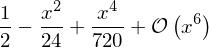

In [108]:
series((1-cosx)/x**2,n=6)

Series can be differentiated and integrated.

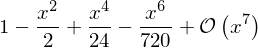

In [109]:
diff(sinx,x)

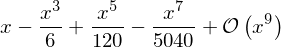

In [110]:
integrate(cosx,x)

A series (starting from a small term) can be substituted for an expansion variable in another series. Here are $\sin(\tan(x))$ and $\tan(\sin(x))$.

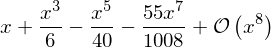

In [111]:
st=series(sinx.subs(x,tanx),n=8)
st

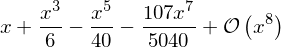

In [112]:
ts=series(tanx.subs(x,sinx),n=8)
ts

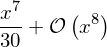

In [113]:
series(ts-st,n=8)

It is not possible to substitute a numerical value for the expansion variable in a series (and hence to plot it). To this end one has to remove the $\mathcal{O}$ term first, transforming a series into a polynomial.

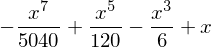

In [114]:
sinx.removeO()

## Derivatives

In [115]:
a=x*sin(x+y)
a

In [116]:
diff(a,x)

In [117]:
diff(a,y)

The second derivative in $x$ and the first one in $y$.

In [118]:
diff(a,x,2,y)

Expressions with undefined functions can be differentiated.

In [119]:
a=x*f(x**2)
a

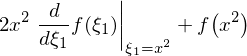

In [120]:
b=diff(a,x)
b

What's this?

In [121]:
print(b)

2*x**2*Subs(Derivative(f(_xi_1), _xi_1), (_xi_1,), (x**2,)) + f(x**2)


The function `Derivative` represents an unevaluated derivative. It can be evaluated by the method `doit`.

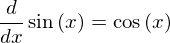

In [122]:
a=Derivative(sin(x),x)
Eq(a,a.doit())

## Integrals

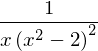

In [123]:
a=1/(x*(x**2-2)**2)
a

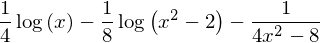

In [124]:
integrate(a,x)

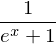

In [125]:
a=1/(exp(x)+1)
a

In [126]:
integrate(a,x)

In [127]:
integrate(log(x),x)

In [128]:
integrate(x*sin(x),x)

In [129]:
a=x*exp(-x**2)
a

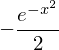

In [130]:
integrate(a,x)

In [131]:
a=x**x
a

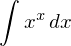

In [132]:
b=integrate(a,x)
b

This is an unevaluated integral.

In [133]:
print(b)

Integral(x**x, x)


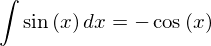

In [134]:
a=Integral(sin(x),x)
Eq(a,a.doit())

Definite integrals.

In [135]:
integrate(sin(x),(x,0,pi))

`oo` means $\infty$.

In [136]:
integrate(exp(-x**2),(x,0,oo))

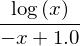

In [137]:
a=log(x)/(Float(1)-x)
a

In [138]:
integrate(a,(x,0,1))

In [139]:
integrate(a,(x,0,1)).n(5)

## Summing series

In [140]:
summation(1/n**2,(n,1,oo))

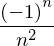

In [141]:
a=(-1)**n/n**2
a

In [142]:
summation(a,(n,1,oo))

In [143]:
summation(a,(n,1,oo)).n(5)

In [144]:
summation(1/n**4,(n,1,oo))

An unevaluated sum is denoted `Sum`.

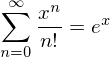

In [145]:
a=Sum(x**n/factorial(n),(n,0,oo))
Eq(a,a.doit())

## Limits

In [146]:
a=tan(sin(x))-sin(tan(x))
a

In [147]:
limit(a/x**7,x,0)

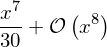

In [148]:
series(a,n=8)

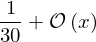

In [149]:
simplify(series(a,n=8)/x**7)

This limit is easy: just expand the numerator and the denominator into series. Things become more difficult if $x=0$ is an essential singularity. Let's calculate one-sided limits.

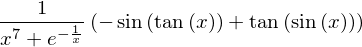

In [150]:
a=(tan(sin(x))-sin(tan(x)))/(x**7+exp(-1/x))
a

In [151]:
limit(a,x,0,'+')

In [152]:
limit(a,x,0,'-')

In [153]:
print(limit(a,x,0), ";)")

1/30 ;)


## Differential equations

In [154]:
t=Symbol('t')
x=Function('x')
p=Function('p')

First order.

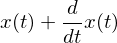

In [155]:
a=diff(x(t),t)+x(t)
a

In [156]:
dsolve(a,x(t))

Second order.

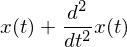

In [157]:
a=diff(x(t),t,2)+x(t)
a

In [158]:
dsolve(a,x(t))

A system of first-order equations.

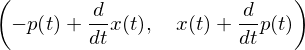

In [159]:
e1=diff(x(t),t)-p(t)
e2=diff(p(t),t)+x(t)
e1,e2

In [160]:
dsolve((e1,e2))

## Linear algebra

In [161]:
a,b,c,d,e,f=symbols('a b c d e f')

A matrix can be constructed from a list of lists.

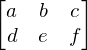

In [162]:
M=Matrix([[a,b,c],[d,e,f]])
M

In [163]:
M.shape

A row matrix.

In [164]:
Matrix([[1,2,3]])

A column matrix.

In [165]:
Matrix([1,2,3])

;)

In [166]:
Matrix([[1],[2],[3]])

In [167]:
Matrix([1,2,3]).shape, Matrix([[1],[2],[3]]).shape

A matrix can be constructed from a function.

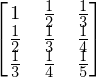

In [168]:
def g(i,j):
    return Rational(1,i+j+1)
Matrix(3,3,g)

Or from an undefined function.

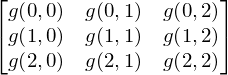

In [169]:
g=Function('g')
M=Matrix(3,3,g)
M

In [170]:
M[1,2]

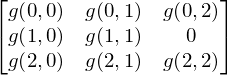

In [171]:
M[1,2]=0
M

In [172]:
M[2,:]

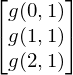

In [173]:
M[:,1]

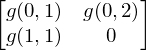

In [174]:
M[0:2,1:3]

Function of undefined function

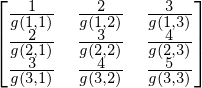

In [175]:
Matrix(3,3, lambda i,j: (i+j+1)/g(i+1,j+1))

A unit matrix.

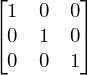

In [176]:
eye(3)

A zero matrix.

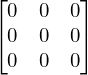

In [177]:
zeros(3)

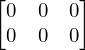

In [178]:
zeros(2,3)

A diagonal matrix.

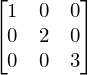

In [179]:
diag(1,2,3)

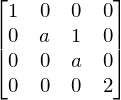

In [180]:
M=Matrix([[a,1],[0,a]])
diag(1,M,2)

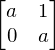

In [181]:
M

Operations with matrices.

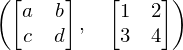

In [182]:
A=Matrix([[a,b],[c,d]])
B=Matrix([[1,2],[3,4]])
A,B

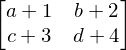

In [183]:
A+B

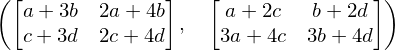

In [184]:
A*B,B*A

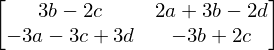

In [185]:
A*B-B*A

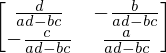

In [186]:
A**(-1)

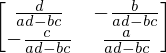

In [187]:
simplify(A**(-1))

In [188]:
det(A)

### Eigenvalues and eigenvectors

In [189]:
x=Symbol('x',real=True)

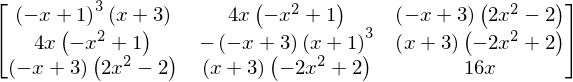

In [190]:
M=Matrix([[(1-x)**3*(3+x),4*x*(1-x**2),-2*(1-x**2)*(3-x)],
          [4*x*(1-x**2),-(1+x)**3*(3-x),2*(1-x**2)*(3+x)],
          [-2*(1-x**2)*(3-x),2*(1-x**2)*(3+x),16*x]])
M

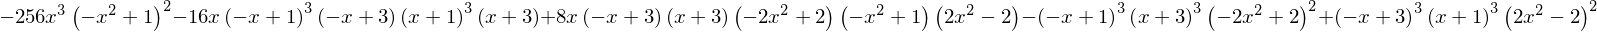

In [191]:
det(M)

In [192]:
expand(det(M))

This means that this matrix has a null space (this matrix transforms vectors from this subspace into 0). Let's find a basis of this subspace.

In [193]:
v=M.nullspace()
len(v)

It is one-dimensional.

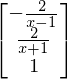

In [194]:
v=simplify(v[0])
v

Let's check.

In [195]:
simplify(M*v)

The eigenvalues and their multiplicities.

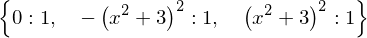

In [196]:
M.eigenvals()

If both eigenvalues and corresponding eigenvectors are needed, the method `eigenvects` is used. It returns a list of tuples. In each tuple the zeroth element is an eigenvalue, the first one is its multiplicity, and the last one is a list of corresponding basis eigenvectors (their number is the multiplicity).

In [197]:
v=M.eigenvects()
len(v)

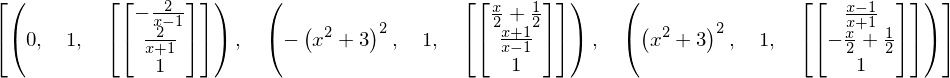

In [198]:
for i in range(len(v)):
    v[i][2][0]=simplify(v[i][2][0])
v

Let's check.

In [199]:
for i in range(len(v)):
    z=M*v[i][2][0]-v[i][0]*v[i][2][0]
    pprint(simplify(z))

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


### Jordan normal form

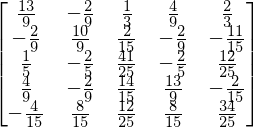

In [200]:
R=Rational
M=Matrix([[ R(13,9),-R(2,9), R(1,3),   R(4,9),  R(2,3)  ],
          [-R(2,9),  R(10,9),R(2,15), -R(2,9), -R(11,15)],
          [ R(1,5), -R(2,5), R(41,25),-R(2,5),  R(12,25)],
          [ R(4,9), -R(2,9), R(14,15), R(13,9),-R(2,15) ],
          [-R(4,15), R(8,15),R(12,25), R(8,15), R(34,25)]])
M

The method `M.jordan_form()` returns a couple of matrices, the transformation matrix $P$ and the Jordan form $J$: $M = P J P^{-1}$.

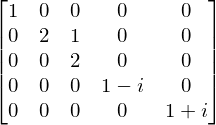

In [201]:
P,J=M.jordan_form()
J

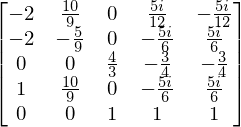

In [202]:
P=simplify(P)
P

Let's check.

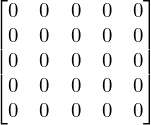

In [203]:
Z=P*J*P**(-1)-M
simplify(Z)

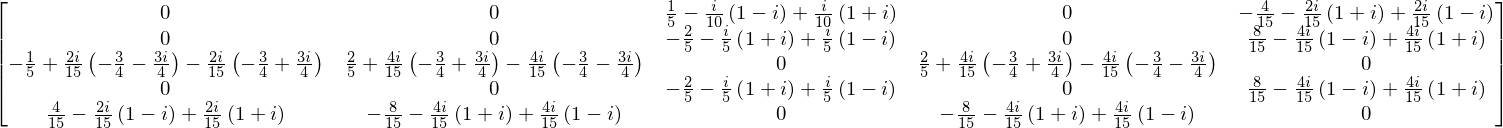

In [204]:
Z

## Plots

`SymPy` uses `matplotlib`. However, it distributes $x$ points adaptively, not uniformly.

In [205]:
%matplotlib inline

A single function.

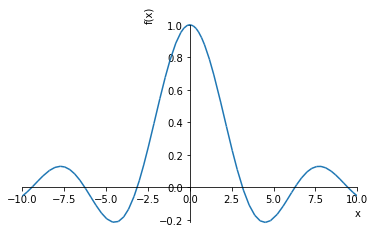

In [206]:
plot(sin(x)/x,(x,-10,10))

Several functions.

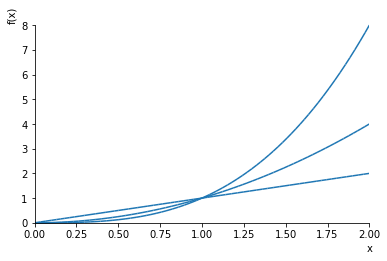

In [207]:
plot(x,x**2,x**3,(x,0,2))

Some additional plotting functions can be imported from `sympy.plotting`.

In [208]:
from sympy.plotting import (plot_parametric,
                            plot_implicit,
                            plot3d,
                            plot3d_parametric_line,
                            plot3d_parametric_surface)

A parametric plot - a Lissajous curve.

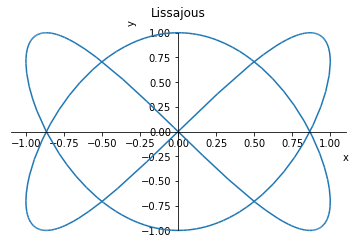

In [209]:
t=Symbol('t')
plot_parametric(sin(2*t),cos(3*t),(t,0,2*pi),
                title='Lissajous',xlabel='x',ylabel='y')

An implicit plot - a circle.

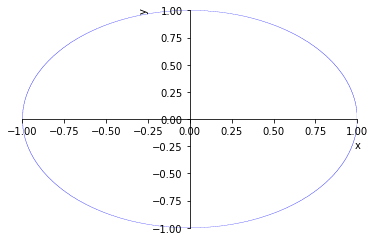

In [210]:
plot_implicit(x**2+y**2-1,(x,-1,1),(y,-1,1))

A surface. If it is not inline but in a separate window, you can rotate it with your mouse.

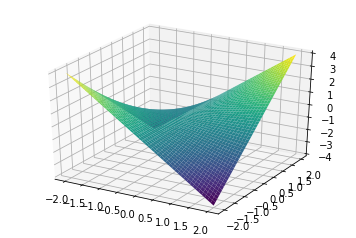

In [211]:
plot3d(x*y,(x,-2,2),(y,-2,2))

Several surfaces.

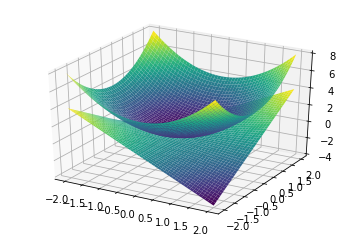

In [212]:
plot3d(x**2+y**2,x*y,(x,-2,2),(y,-2,2))

A parametric space curve - a spiral.

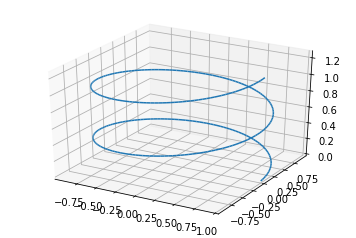

In [213]:
a=0.1
plot3d_parametric_line(cos(t),sin(t),a*t,(t,0,4*pi))

A parametric surface - a torus.

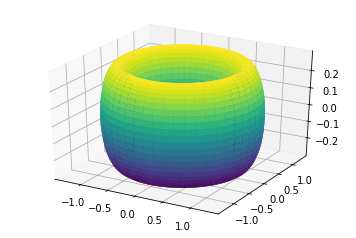

In [214]:
u,v=symbols('u v')
a=0.3
plot3d_parametric_surface((1+a*cos(u))*cos(v),
                          (1+a*cos(u))*sin(v),
                          a*sin(u),
                          (u,0,2*pi),(v,0,2*pi))